### 1.Problem Statement

In this assignment students have to find the frequency of words in a webpage. 
User can use urllib and BeautifulSoup to extract text from webpage.


In [29]:
from bs4 import BeautifulSoup 
import urllib.request
import nltk
import matplotlib.pyplot as plt
import nltk
import pandas as pd


response = urllib.request.urlopen('http://php.net/') 
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [5]:
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml"><head>

  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

  <title>PHP: Hypertext Preprocessor</title>

 <link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
 <link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
 <link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
 <link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>

 <link href="https://www.php.net/index.php" rel="canonical"/>
 <link href="https://www.php.net/index" rel="shorturl"/>
 <link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>



<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<

In [6]:
text=[]
for i in soup.findAll('article',{'class':"newsentry"}):
    text.append(i.text)
text

['\n  \n    07 Jan 2021\n    \n      PHP 8.0.1 Released!\n    \n  \n  \n    The PHP development team announces the immediate availability of PHP 8.0.1. This is a bug fix release.\n\nAll PHP 8.0 users are encouraged to upgrade to this version.\n\nFor source downloads of PHP 8.0.1 please visit our downloads page,\nWindows source and binaries can be found on windows.php.net/download/.\nThe list of changes is recorded in the ChangeLog.\n    \n  \n  \n',
 '\n  \n    07 Jan 2021\n    \n      PHP 7.3.26 Released!\n    \n  \n  \n    The PHP development team announces the immediate availability of PHP 7.3.26. This is a security release.\n\nAll PHP 7.3 users are encouraged to upgrade to this version.\n\nFor source downloads of PHP 7.3.26 please visit our downloads page,\nWindows source and binaries can be found on windows.php.net/download/.\nThe list of changes is recorded in the ChangeLog.\n    \n  \n  \n',
 '\n  \n    07 Jan 2021\n    \n      PHP 7.4.14 Released!\n    \n  \n  \n    The PHP dev

In [21]:
import re

text_cleaned=[]
for string in text:
    
    str1=' '.join(string.split())
    str3=re.sub(r'\s',' ',str1)
    str4=re.sub(r'[^a-zA-Z\s]',' ',str3)
    str5=str4.split()
    for i in str5:
        text_cleaned.append(i)

In [22]:
len(text_cleaned)

2553

In [25]:
text_cleaned[:10]

['Jan',
 'PHP',
 'Released',
 'The',
 'PHP',
 'development',
 'team',
 'announces',
 'the',
 'immediate']

In [24]:
# import re

# str1=text[0]
# str1=' '.join(str1.split())
# str2 = re.sub(r"\s{3,}", " ",str1)
# str3=re.sub(r'\s',' ',str2)
# str4=re.sub(r'[^a-zA-Z]',' ',str3)
# str4

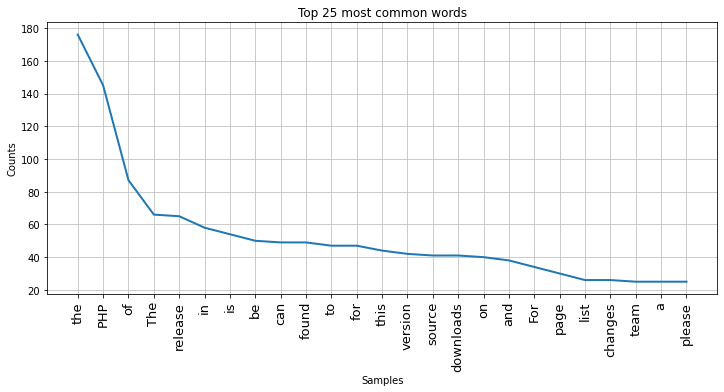

<AxesSubplot:title={'center':'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [27]:
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13,rotation=90)
fd=nltk.FreqDist(text_cleaned)
fd.plot(25,cumulative=False)

In [41]:
frequency=pd.DataFrame([fd]).transpose()
frequency.rename(columns={0:'Frequency'},inplace=True)
frequency

,Frequency
Jan,3
PHP,145
Released,17
The,66
development,17
...,...
which,3
specified,3
Aug,6
fifth,1
